<style>
@media print
{
h2 {page-break-before:always}
}
</style>

# Homework 07

### Brown University  
### DATA 1010  
### Fall 2019

In [4]:
using Plots, LaTeXStrings, Distributions, Optim, SymPy, Roots

## Problem 1

Consider the probability space $\Omega = \mathbb{Z} \times \{\mathrm{A}, \mathrm{B}, \mathrm{C}\}$. We will represent an element of $\Omega$ as $\omega = (\omega_1, \omega_2)$, where $\omega_1 \in \mathbb{Z}$ and $\omega_2 \in \{\mathrm{A}, \mathrm{B}, \mathrm{C}\}$.
Suppose that $\mathbb{P}(\omega_2 = \mathrm{A}) = \frac{1}{4}$,  $\mathbb{P}(\omega_2 = \mathrm{B}) = \frac{1}{5}$, and  $\mathbb{P}(\omega_2 = \mathrm{C}) = \frac{11}{20}$.

Suppose further that  
(i) the conditional distribution of $\omega_1$ given $\{\omega_2 = \mathrm{A}\}$ has probability mass function $n\mapsto \frac{1}{3}2^{-|n|}$,  
(ii) the conditional distribution of $\omega_1$ given $\{\omega_2 = \mathrm{B}\}$ is the uniform distribution on $\{-2,-1,0,1,2\}$, and  
(iii) the conditional distribution of $\omega_1$ given $\{\omega_2 = \mathrm{C}\}$ has probability mass function $n\mapsto \boldsymbol{1}_{\{n \geq 1\}} \frac{6}{\pi^2 n^2}$.

Find the conditional distribution of the random variable $Y(\omega) = \omega_2$ given: 

* $X = 2$
* $X = 7$
* $X\geq 10$,

where $X$ is the random variable defined by $X(\omega) = \omega_1$. 

(In each case, express the conditional probabilities as percentages rounded to the nearest hundredth of a percent.)

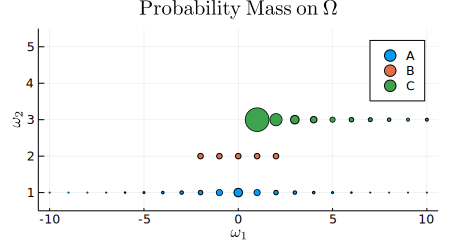

In [2]:
ns = -10:10
scatter([(n,1) for n in ns], markersize = 30*1/4*sqrt.([2.0^(-abs(n))/3 for n in ns]), label = "A")
scatter!([(n,2) for n in -2:2], markersize = 30*1/5*sqrt.([1/5 for n in -2:2]), label = "B")
scatter!([(n,3) for n in 1:ns[end]], markersize = 30*11/20*sqrt.([6/(π^2*n^2) for n in 1:ns[end]]), label = "C")
plot!(ylims=(0.5,5.5), xlabel = L"\omega_1", ylabel = L"\omega_2", fontfamily = "Palatino", size = (450,250), 
        title = L"\mathrm{Probability\: Mass\: on\: }\Omega")

*Solution*.  

$X = 2 : $  
$\mathbb{P}(\omega_{2} = A | \omega_{1} = 2) = \frac{\mathbb{P}(\omega_{2} = A)\cap \mathbb{P}(\omega_{1} = 2)}{\mathbb{P}(\omega_{1} = 2)} = \frac{\mathbb{P}(\omega_{1} = 2|\omega_{2} = A) \mathbb{P}(\omega_{2} = A)}{\mathbb{P}(\omega_{1} = 2|\omega_{2} = A) \mathbb{P}(\omega_{2} = A) + \mathbb{P}(\omega_{1} = 2|\omega_{2} = B) \mathbb{P}(\omega_{2} = B) + \mathbb{P}(\omega_{1} = 2|\omega_{2} = C) \mathbb{P}(\omega_{2} = C)}
$  
and by 
```julia
0.25*2.0^(-abs(2))/3/(0.25*2.0^(-abs(2))/3 + 1/5 * 1/5 + 11/20 * 3/(2π^2))
```
we get $\mathbb{P}(\omega_{2} = A | \omega_{1} = 2) = 14.43\%$   
Similarly, we can get $\mathbb{P}(\omega_{2} = B | \omega_{1} = 2) = 27.70\%$   
and $\mathbb{P}(\omega_{2} = C | \omega_{1} = 2) = 57.88\%$

$X = 7 : $  
$\mathbb{P}(\omega_{2} = A | \omega_{1} = 7) = \frac{\mathbb{P}(\omega_{2} = A)\cap \mathbb{P}(\omega_{1} = 7)}{\mathbb{P}(\omega_{1} = 7)} = \frac{\mathbb{P}(\omega_{1} = 7|\omega_{2} = A) \mathbb{P}(\omega_{2} = A)}{\mathbb{P}(\omega_{1} = 7|\omega_{2} = A) \mathbb{P}(\omega_{2} = A) + \mathbb{P}(\omega_{1} = 7|\omega_{2} = C)\mathbb{P}(\omega_{2} = C)}
$  
and we get $\mathbb{P}(\omega_{2} = A | \omega_{1} = 7) = 8.71 \%$   
Similarly, we can get $\mathbb{P}(\omega_{2} = C | \omega_{1} = 7) = 91.29 \%$,  
$\mathbb{P}(\omega_{2} = B | \omega_{1} = 7) = 0 \%$

$X\geq 10 : $   
$\mathbb{P}(\omega_{2} = A | \omega_{1}\geq 10) = \frac{\mathbb{P}(\omega_{2} = A)\cap \mathbb{P}(\omega_{1}\geq 10)}{\mathbb{P}(\omega_{1}\geq 10)} = \frac{\mathbb{P}(\omega_{1}\geq 10|\omega_{2} = A) \mathbb{P}(\omega_{2} = A)}{\mathbb{P}(\omega_{1}\geq 10|\omega_{2} = A) \mathbb{P}(\omega_{2} = A) + \mathbb{P}(\omega_{1} \geq 10|\omega_{2} = C)\mathbb{P}(\omega_{2} = C)}
$  
and we get $\mathbb{P}(\omega_{2} = A | \omega_{1}\geq 10) = 56.63 \%$  
Similarly, we can get $\mathbb{P}(\omega_{2} = C | \omega_{1}\geq 10) = 43.37 \%$,  
$\mathbb{P}(\omega_{2} = B | \omega_{1}\geq 10) = 0 \%$


## Problem 2

Show that for each $\alpha \in [0,1]$, there exists $t \in [0,\infty]$ such that such that the likelihood ratio classifier $h_t$ is the function $h: \mathcal{X} \to \mathcal{Y}$ which minimizes
$$
L(h) = 
      \alpha \, \mathbb{P}(h(X) = +1 \text{ and }Y = -1) +
      (1-\alpha) \mathbb{P}(h(X) = -1 \text{ and }Y = +1).
$$
      

(a) Identify the relationship between $\alpha$ and its corresponding $t$ value. (For simplicity, assume that $\mathcal{X}$ is finite.) *Hint:* write $L(h)$ as a sum over the elements $x \in \mathcal{X}$. For each $x$, consider the resulting contribution to that sum if $h(x) = +1$, and similarly for $h(x) = -1$. Classify each $x$ according to which of the two contributions is smaller.


*Solution.*    
In order to minimize $L(h)$, it is equivalent to minimizing $\sum \alpha p_{-}f_{-} \mathbf{1} _{h(X) = +1} + (1-\alpha) p_{+}f_{+} \mathbf{1} _{h(X) = -1}$  
For each $x$, we classify $h(X) = +1$ when $(1-\alpha) p_{+}f_{+} \ge \alpha p_{-}f_{-} $,   
and classify $h(X) = -1$ when $\alpha p_{-}f_{-} \ge (1-\alpha) p_{+}f_{+}$,   
by solving $(1-\alpha) p_{+}f_{+} \ge \alpha p_{-}f_{-}$, 
thus we have threshold $t = \frac{f_{+}}{f_{-}} = \frac{\alpha p_{-}}{(1-\alpha)p_{+}}$

## Problem 3

Suppose that $X$ is a length$-p$ random vector and that we have $n$ observations drawn from the distribution of $X$. Let $\widehat{\Sigma}$ be the plug-in estimator of the covariance matrix of $X$. Show that if $n < p$, then $\widehat{\Sigma}$ is singular. 

*Solution.*        
The plug-in estimator of the covariance matrix of X is $\widehat{\Sigma} = \frac{1}{n-1}\sum_{i=1}^{n}(X_{i}-\bar{X})(X_{i}-\bar{X})'$, and it is a $n \times n$ matrix. If we know any n-1 $X_{i}$ and $\bar{X}$, we could calculate the value of $X_{n}$, as well as $(X_{n}-\bar{X})(X_{n}-\bar{X})'$. Thus the n columns are linear dependent.   
If n < p, then rank of the sample covariance matrix is smaller or equal to n. As we mentioned above, the rank should be at most n-1 due to linear dependence. Thus, $\hat{\Sigma}$ is not full rank, and has determinant of 0. Therefore, it is singular.

## Problem 4

(a) Show that if $f_1, f_2$ are different multivariate normal densities on $\mathbb{R}^2$, then the set of points $(x,y)$ for which $f_1(x,y) = f_2(x,y)$ is a line or a conic section (in other words, it is the solution set of a linear or quadratic equation).
    
(b) Show that if the covariance matrices for the two densities are the same, then the solution set of $f_1(x,y) = f_2(x,y)$ is a line.

  You might find this snippet helpful
```julia
using SymPy
@vars x y μ₁ μ₂ a b c real=true
Σ⁻¹ = [a c; c b]
v = [x - μ₁, y - μ₂]
expand(v' * Σ⁻¹ * v)
```

*Solution*. 

In [76]:
# (a)
@vars x y μ₁ μ₂ μ₃ μ₄ a b c d e g real=true
Σ⁻¹₁ = [a c; c b]
v₁ = [x - μ₁, y - μ₂]

Σ⁻¹₂ = [d e; e g]
v₂ = [x - μ₃, y - μ₄]

f₁ = expand(v₁' * Σ⁻¹₁ * v₁)
f₂ = expand(v₂' * Σ⁻¹₂ * v₂)
f₁ - f₂

   2                  2      2                  2                             
a⋅x  - 2⋅a⋅x⋅μ₁ + a⋅μ₁  + b⋅y  - 2⋅b⋅y⋅μ₂ + b⋅μ₂  + 2⋅c⋅x⋅y - 2⋅c⋅x⋅μ₂ - 2⋅c⋅y

                     2                  2                                     
⋅μ₁ + 2⋅c⋅μ₁⋅μ₂ - d⋅x  + 2⋅d⋅x⋅μ₃ - d⋅μ₃  - 2⋅e⋅x⋅y + 2⋅e⋅x⋅μ₄ + 2⋅e⋅y⋅μ₃ - 2⋅

             2                  2
e⋅μ₃⋅μ₄ - g⋅y  + 2⋅g⋅y⋅μ₄ - g⋅μ₄ 

(a)  

If we combine terms with same variables, we will get $f_{1} - f_{2} = Ax^2 + By^2 + Cx + Dy + E = 0$ for some constant $A,B,C,D,E$.   
If we have $a = h$ and $b = g$, then we will have $A = B = 0$, and the solution is a line;  
If we have $a\ne h$ and $b\ne g$, then we will have $A\ne0$ and $B\ne0$, and the solution is a quadratic equation. 

In [81]:
# (b)
Σ⁻¹₁ = [a c; c b]
v₁ = [x - μ₁, y - μ₂]
v₂ = [x - μ₃, y - μ₄]

f₁ = expand(v₁' * Σ⁻¹₁ * v₁)
f₂ = expand(v₂' * Σ⁻¹₁ * v₂)
f₁ - f₂

                           2       2                             2       2    
-2⋅a⋅x⋅μ₁ + 2⋅a⋅x⋅μ₃ + a⋅μ₁  - a⋅μ₃  - 2⋅b⋅y⋅μ₂ + 2⋅b⋅y⋅μ₄ + b⋅μ₂  - b⋅μ₄  - 2

                                                                
⋅c⋅x⋅μ₂ + 2⋅c⋅x⋅μ₄ - 2⋅c⋅y⋅μ₁ + 2⋅c⋅y⋅μ₃ + 2⋅c⋅μ₁⋅μ₂ - 2⋅c⋅μ₃⋅μ₄

(b)  

If $f_{1}$ and $f_{2}$ have the same covariance matrices, then $f_{1} - f_{2} = Cx + Dy + E = 0$ is a line for some constant $C, D, E$

## Problem 5

(a) Train a logistic regression model to estimate the probability that an observation is red given its $x$ value, given the lists of $x$ values for red and blue observations shown. 

(b) Repeat but with with a prediction function involving a *quadratic* function of the feature value: $x\mapsto 1/(1+\exp(-\alpha-\beta x-\gamma x^2))$. Does the resulting curve have a different shape?

*Solution*. 

 * Status: success

 * Candidate solution
    Minimizer: [-1.62e+00, 9.24e-01]
    Minimum:   3.888310e+00

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [0.00e+00, 1.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    39
    f(x) calls:    81


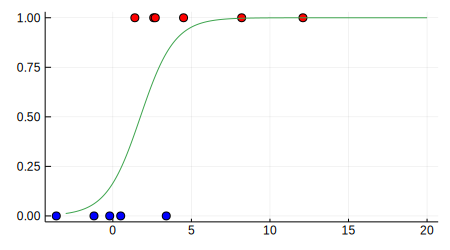

In [78]:
# (a)
reds = [4.5, 2.6, 2.7, 8.2, 1.4, 12.1]
blues = [0.5, 3.4, -1.2, -3.6, -0.2]

f(α, β, x) = 1/(1+exp(-α-β*x))
    
function loss(reds, blues, θ)
    α, β = θ
    sum(log(1/(1-f(α, β, x))) for x in blues) + 
        sum(log(1/f(α, β, x)) for x in reds)
end
 
print(optimize(θ->loss(reds, blues, θ), [0.0, 1.0]))

scatter([(r,1) for r in reds], color = :red, legend = false, size = (450, 250))
scatter!([(b,0) for b in blues], color = :blue)
α, β = -1.62e+00, 9.24e-01
plot!(-3:0.01:20, x -> f(α, β, x), label = "logistic regression")

 * Status: success

 * Candidate solution
    Minimizer: [-1.81e+00, 1.21e+00, -5.95e-02]
    Minimum:   3.783678e+00

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [0.00e+00, 0.00e+00, 1.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    126
    f(x) calls:    235


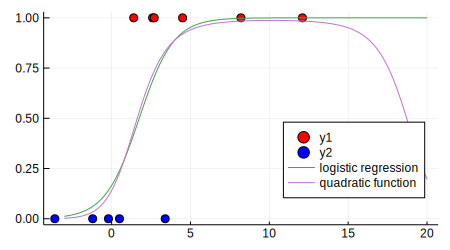

In [79]:
f(α, β, γ ,x) = 1/(1+exp(-α-β*x-γ*x^2))
    
function loss(reds, blues, θ)
    α, β, γ= θ
    sum(log(1/(1-f(α, β, γ ,x))) for x in blues) + 
        sum(log(1/f(α, β, γ ,x)) for x in reds)
end
 
print(optimize(θ->loss(reds, blues, θ), [0.0, 0.0, 1.0]))

α, β, γ= -1.81e+00, 1.21e+00, -5.95e-02
plot!(-3:0.01:20, x -> f(α, β, γ, x), label = "quadratic function", legend = :bottomright)

## Problem 6

Explain why the empirical ROC in the the fourth question from [Friday's in-class set](https://nbviewer.jupyter.org/github/data1010/problem-sets/blob/master/10-18/data1010-10-18.ipynb)) has a stair-step shape. What would have to be true of the data for the shape to be different?

*Solution.*   
For the threshold between two observations, the empirical ROC values stay same as there is no changes to the detection rate and the false alarm rate, thus for the interval of the threshold when it is within two consecutive observations, the emporocal ROC value does not change. Therefore the ROC has a stair-step shape. If we have relatively large data and the intervals between two consecutive points are small, we would have a smoother curve.

## Problem 7

Our approach to approximating the ROC empirically depends on having univariate data which are separated by a single threshold. 

(a) Suppose that the probability measure is as shown in the figure below. Plot the actual ROC for this measure. 

(b) Draw 100 observations from this measure, and devise a scheme for using them to empirically approximate the ROC. You may build in the assumption that there will be two thresholds, with the prediction function returning blue between them and red outside them, but you should avoid using any other knowledge of the underlying measure. 

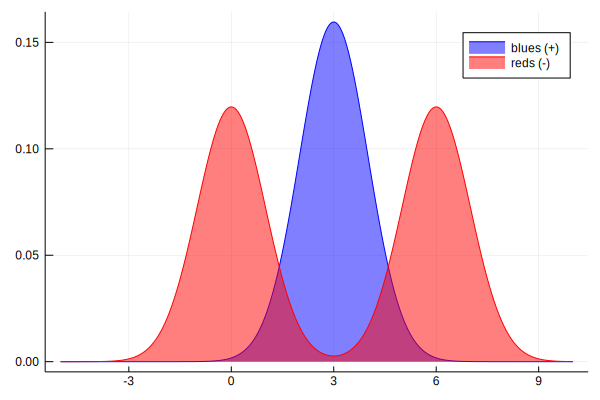

In [3]:
xgrid = -5:0.01:10
plot(xgrid, x->0.4pdf(Normal(3,1),x), fillrange = 0, fillopacity = 0.5, color = :blue, label = "blues (+)")
plot!(xgrid, x->0.6(0.5pdf(Normal(0,1),x) + 0.5pdf(Normal(6,1),x)), fillrange = 0, fillopacity = 0.5, color = :red, label = "reds (-)")

*Solution*. 

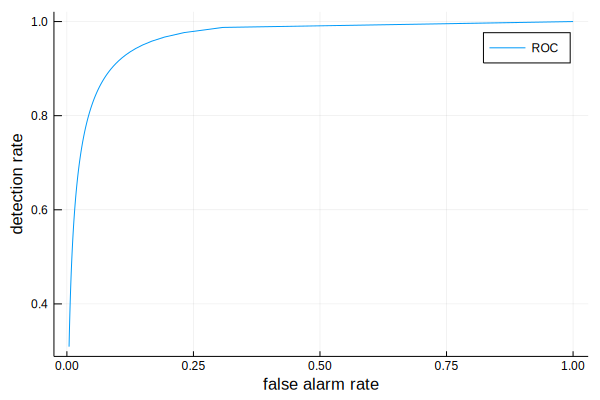

In [19]:
x(t) = find_zero(x -> pdf(Normal(3,1),x) - t*(0.5pdf(Normal(0,1),x) + 0.5pdf(Normal(6,1),x)), 1) # to get x

FAR(t) = 1 - 2*(0.5cdf(Normal(0,1),x(t)) + 0.5cdf(Normal(6,1),x(t)))
DR(t) = 1 - 2*cdf(Normal(3,1),x(t))

# x₂ = 6 - x(t)

ROC = [(FAR(t),DR(t)) for t in 0:0.1:50]
plot(ROC, label = "ROC")
plot!(xlabel = "false alarm rate", ylabel = "detection rate")

## Problem 8

Train a logistic regression classifier for identifying a car as American or Japanese based on its weight and MPG rating. Augment the feature matrix by including quadratic combinations of the regressors.

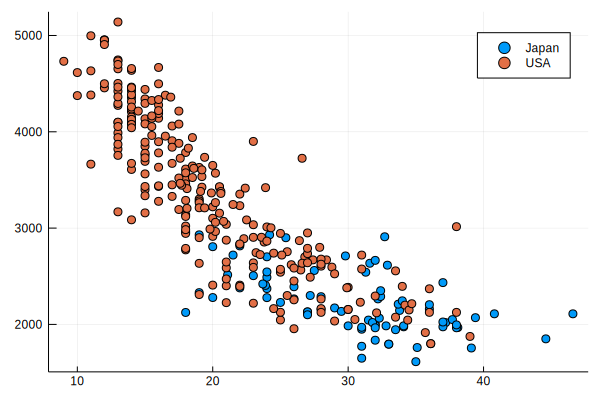

In [2]:
using VegaDatasets, Plots, DataFrames
D = DataFrame(dataset("cars"))
cars = [((x,y),c) for (x,y,c) in zip(D[:,:Miles_per_Gallon],
                                     D[:,:Weight_in_lbs],
                                     D[:,:Origin]) 
           if !any(ismissing.([x,y,c])) && c ≠ "Europe"]
x₁s = [x₁ for ((x₁,x₂),y) in cars]
x₂s = [x₂ for ((x₁,x₂),y) in cars]
ys = [y for ((x₁,x₂),y) in cars]
scatter(x₁s,x₂s,group=ys)

*Solution*. 

[2.9785874875941634, -0.46063678679729997, 3.5736547576019095, -0.31813015222420327, 0.4193272596548962, -0.7193934547939589]

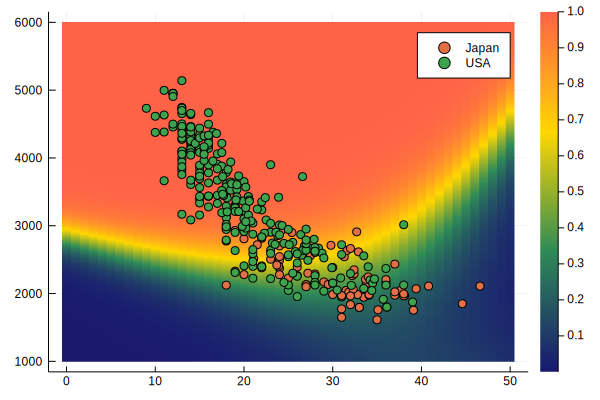

In [45]:
xgrid = 0:1:50
ygrid = 1000:10:6000
mu1 = mean(x₁s)
std1 = std(x₁s)
x1 = (x₁s .- mu1) ./ std1
mu2 = mean(x₂s)
std2 = std(x₂s)
x2 = (x₂s .- mu2) ./ std2
y1 = [y == "USA" for y in ys]

observations = [([x₁,x₂], y) for (x₁,x₂,y) in zip(x1,x2,y1) ]

σ(u) = 1/(1 + exp(-u)) 
r(β,x) = σ(β'*[1; x; x.^2; x[1]*x[2]])
C(β,xᵢ,yᵢ) = yᵢ*log(1/r(β,xᵢ))+(1-yᵢ)*log(1/(1-r(β,xᵢ)))
L(β) = sum(C(β,xᵢ,yᵢ) for (xᵢ,yᵢ) in observations)
β̂ = optimize(L, ones(6), BFGS()).minimizer
print(β̂)
heatmap(xgrid,ygrid,(x,y)->r(β̂,[(x-mu1)/std1,(y-mu2)/std2]), fillcolor = cgrad([:MidnightBlue,:SeaGreen,:Gold,:Tomato]))
scatter!(x₁s,x₂s,group=ys)

## Problem 9

Train a Naive Bayes classifier for identifying a car as American or Japanese based on its weight and MPG rating. For estimating the marginal densities of each class, just assume that the marginal distributions are Gaussian. 

*Solution*. 

## Problem 10

Use the code cells below to download public Enron emails (each of which is tagged as spam or "ham" (legitimate) and prepare them for analysis. 

(a) Find the 2000 most common words across both spam and legitimate messages. This will be your vocabulary $W$. 

(b) Regard each message as an element of $\{0,1\}^{2000}$, where the $k$th component of the message is 1 if the $k$th word of $W$ is in the message, and 0 otherwise. Train a classifier which approximates the class conditional distributions on $\{0,1\}^{2000}$ using the Naive Bayes assumption: each probability measure is a product of binomial distributions (one for each component). Your `predict` function should take an email message as input and return `"legitimate"` or `"spam"`. 

(c) Test your function on the messages shown in the last cell below.

*Note: You should not consult examples online to solve this problem. Most solutions use libraries that short-circuit the purpose of the exercise, and you have the tools you need to approach the problem by hand: you can loop through the emails to approximate word frequencies in your vocabulary, multiply proportions to get spam and legitimate message likelihoods, and compare them using the Bayes classifier formula $\operatorname{argmax}_c(p_cf_c(\mathbf{x}))$.*

In [47]:
import Pkg; Pkg.add("HTTP"); Pkg.add("TextAnalysis")

 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
  [cd3eb016] + HTTP v0.8.6
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
 Installed BSON ─────────── v0.2.4
 Installed StrTables ────── v1.0.1
 Installed HTML_Entities ── v1.0.0
 Installed WordTokenizers ─ v0.5.3
 Installed TextAnalysis ─── v0.6.0
 Installed Languages ────── v0.4.2
  Updating `/opt/julia/environments/v1.2/Project.toml`
  [a2db99b7] + TextAnalysis v0.6.0
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
  [fbb218c0] + BSON v0.2.4
  [7693890a] + HTML_Entities v1.0.0
  [8ef0a80b] + Languages v0.4.2
  [9700d1a9] + StrTables v1.0.1
  [a2db99b7] + TextAnalysis v0.6.0
  [796a5d58] + WordTokenizers v0.5.3
  Building HTML_Entities → `~/.julia/packages/HTML_Entities/g4t7p/deps/build.log`
  Building TextAnalysis ─→ `~/.julia/packages/TextAnalysis/pcFQf/deps/build.log`


In [52]:
using HTTP
url = "http://www.aueb.gr/users/ion/data/enron-spam/preprocessed/"
enron_files = ["enron1.tar.gz", "enron2.tar.gz", "enron3.tar.gz",
               "enron4.tar.gz", "enron5.tar.gz", "enron6.tar.gz"]

tmp_paths = [HTTP.download(url * file) for file in enron_files]

p = tmp_paths[1] # just use the first one initially; you can use the other 5 once you have your model working
# run(`tar -xvzf $p`) # unzip the downloaded files

┌ Info: Downloading
│   source = http://www.aueb.gr/users/ion/data/enron-spam/preprocessed/enron1.tar.gz
│   dest = /tmp/enron1.tar.gz
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 173.828 KiB/s
│   downloaded = 178 bytes
│   remaining = 0 bytes
│   total = 178 bytes
└ @ HTTP /opt/julia/packages/HTTP/hJSsm/src/download.jl:119
┌ Info: Downloading
│   source = http://www.aueb.gr/users/ion/data/enron-spam/preprocessed/enron1.tar.gz
│   dest = /tmp/enron1.tar.gz
│   progress = 0.0709
│   time_taken = 1.09 s
│   time_remaining = 14.31 s
│   average_speed = 114.300 KiB/s
│   downloaded = 124.815 KiB
│   remaining = 1.597 MiB
│   total = 1.719 MiB
└ @ HTTP /opt/julia/packages/HTTP/hJSsm/src/download.jl:119
┌ Info: Downloading
│   source = http://www.aueb.gr/users/ion/data/enron-spam/preprocessed/enron1.tar.gz
│   dest = /tmp/enron1.tar.gz
│   progress = 0.2256
│   time_taken = 2.18 s
│   time_remaining = 7.5 s
│   average_speed = 181.807 KiB/s
│   do

"/tmp/enron1.tar.gz"

In [49]:
using TextAnalysis
function clean_email(message)
    patterns = [:html => (r"<[^<>]+>", " "),
                :number => (r"[0-9]+", "number"),
                :url => (r"(http|https)://[^\s]*", "httpaddr"),
                :email => (r"[^\s]+@[^\s]+", "emailaddr"),
                :dollar => (r"[$]+", "dollar")]
    
    for (symbol, (regex, replacement)) in patterns
        message = replace(message, regex => replacement)
    end
    
    splitting_chars = [' ', '@', '$', '/', '#', '.', '-', ':', '&', '*', '+',
                       '=', '[', ']', '?', '!', '(', ')', '{', '}', ',', '\'', '"',
                       '>', '_', '<', ';', '%']
    raw_words = split(message, splitting_chars)

    # remove all words that are too short
    cleaned_words = [word for word in raw_words if length(word) > 1]

    # remove all non alphanumeric characters from each word
    alpha_numeric_pattern = r"[^a-zA-Z0-9]"
    cleaned_words = [replace(word, alpha_numeric_pattern => "") for word in  cleaned_words]
    
    string_doc = StringDocument(join(cleaned_words, ' '))
    stem!(string_doc)
    stemmed_words = split(TextAnalysis.text(string_doc), ' ')
end

┌ Info: Precompiling TextAnalysis [a2db99b7-8b79-58f8-94bf-bbc811eef33d]
└ @ Base loading.jl:1242


clean_email (generic function with 1 method)

In [50]:
cleaned_legit_emails = [clean_email(read("enron1/ham/" * email_file,String)) for email_file in readdir("enron1/ham")]
cleaned_spam_emails = [clean_email(read("enron1/spam/" * email_file,String)) for email_file in readdir("enron1/spam")];

In [51]:
sort(collect(countmap(vcat(vcat(cleaned_legit_emails...), vcat(cleaned_spam_emails...)))),by=x->x[2], rev=true)[1:2000]

2000-element Array{Pair{SubString{String},Int64},1}:
           "number" => 70592
              "the" => 22909
               "to" => 16437
              "ect" => 11651
              "and" => 11499
              "for" => 9609 
               "of" => 9404 
              "you" => 7542 
              "hou" => 7283 
               "in" => 7051 
               "on" => 6830 
               "is" => 6709 
             "this" => 6246 
                    ⋮       
             "seat" => 35   
            "femal" => 35   
 "numbermacromedia" => 35   
            "coast" => 35   
            "unabl" => 35   
            "plain" => 35   
             "club" => 35   
           "strict" => 35   
            "audit" => 35   
              "son" => 35   
         "intraday" => 35   
        "forexport" => 35   

In [ ]:
function predict(message)
    
end

In [ ]:
test_messages = [
    "Do you still want to play rackets on Friday?",
    "Your purchase won a $1000 gift card! Click here to claim",
    "Call the IRS immediately to avoid prosecution",
    "Would you mind providing some feedback on this recommendation letter? Thanks!"
]
[predict(message) for message in test_messages]